<a href="https://colab.research.google.com/github/joseflix/DocenciaUAB/blob/master/MN1/2020-2021/Examens/20210617_2nParcial_Soluciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MN1: 2º parcial (programación) 17/06/2021**

<hr>

**Nombre:**

**NIU:**

**mail (gmail):**

<hr>

**Instrucciones de edición del Notebook y entrega**

*   Abre el Notebook desde GitHub ("Open in Colab") y genera una copia en tu Drive ("Guardar una copia en Drive"). Edita esa copia para el examen. 
*   Renombra esa copia usando tu NIU como nombre de archivo: "NIU.ipynb" (*por ejemplo, 2055007.ipynb*) 
*   Rellena tu nombre, NIU i mail (gmail o mail del campus, si quieres recibir los comentarios/feedback acerca de tu examen) en la cabecera de este Notebook.
*   Al final del examen, descarga este cuaderno en formato .ipynb y lo tienes que subir al siguiente *drop folder*: [Link](http://cern.ch/go/bkx9). Asegurate de que el fichero tiene el nombre correcto.
*   Podéis volver a subir el fichero si creéis que hay un error pero sólo consideraremos la última versión, y dentro del horario establecido.
*   **NOTA** Antes de entregar o dar por finalizado cada ejercicio, es recomendable reiniciar el entorno de ejecución para ver que se ejecuta todo de forma correcta: "Entorno de ejecución >> Reiniciar entorno de ejecución",y luego "Entorno de ejecución >> Ejecutar todas".

<hr>

**Instrucciones del examen**

*   El examen es de 9h a 12h. No se aceptarán entregas pasada esa hora.
*   Sólo se puede tener el notebook del examen abierto para trabajar, mientras se realiza el examen, y se permitirá conectarse a https://docs.python.org/3/library/index.html para hacer consultas de Python, u otras webs de programación de referencia, así como las prácticas realizadas durante el curso.
<hr>

## **EXAMEN**

In [1]:
# Ejecuta esta parte de código para importar las librerías necesarias
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss

## <font color='green'>**> Ejercicio #1 [3.5 puntos]**</font>

El método de integración numérica "importance sampling" es una variante del método de Monte Carlo que consiste en muestrear una función en más detalle allí donde tiene mayor peso (donde toma valores más altos) ya que esas son las regiones que contribuyen de forma mayoritaria al cálculo del área. Supongamos que queremos hallar la integral:

\begin{equation*}
    I = \int_{-\infty}^\infty dx\;f(x),\text{ con } f(x)=\frac{e^{-x^2}}{1+x^2}
\end{equation*}

Para aplicar este método elegimos una función $g(x)$ tal que sea integrable, no negativa y cuya integral $G(x)$ sea invertible y tenga el valor:

\begin{equation*}
    G(x) = \int_{-\infty}^x dx\;g(x) = 1 , \text{ cuando } x=\infty
\end{equation*}

Además, nos interesa que esa función $g(x)$ tenga aproximadamente la misma forma que la función que queremos integrar. En este caso particular, un buen candidato es una distribución gaussiana con $\mu=0$ y $\sigma=0.5$.

**1.1 [1.25 puntos]:** Realiza una gráfica de $f(x)$ y $g(x)$ para comprobar que efectivamente tienen una forma similar.

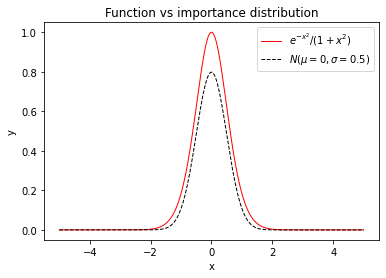

In [ ]:
# Ejercicio 1.1

def f(x):
  return(np.exp(-x**2)/(1+x**2))

def g(x):
  return(ss.norm.pdf(x, loc=0, scale=0.5))

xmin = -5
xmax = 5

x = np.linspace(xmin, xmax, 1000)

plt.plot(x, f(x), linewidth=1, color='red', label=r'$e^{-x^2}/(1+x^2)$')
plt.plot(x, g(x), linewidth=1, color='black', linestyle='--', label=r'$N(\mu=0,\sigma=0.5)$')
plt.title("Function vs importance distribution")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

Introducimos la función $g(x)$ en la integral del siguiente modo:

\begin{equation*}
    I = \int_{-\infty}^\infty dx\; f(x) =
    \int_{-\infty}^\infty dx\; f(x)\frac{g(x)}{g(x)} = 
    \int_{-\infty}^\infty [dx\;g(x)] \frac{f(x)}{g(x)} =
    \int_{0}^1 dy\; \frac{f[G^{-1}(y)]}{g[G^{-1}(y)]}
\end{equation*}

Donde hemos utilizado el cambio de variable $y=G(x)$. $y=G(x)$ solo puede tomar valores entre 0 y 1, y estos valores siguen una distribución uniforme. Por lo tanto, aplicando el teorema de transformación visto en clase, la variable $G^{-1}(y)$ seguirá la distribución $g(x)$.

Para calcular esta integral de forma numérica debemos escribirla en forma de suma, es decir:

\begin{equation*}
    I \approx \frac{1}{N}\sum_{i=1}^N \frac{f[G^{-1}(y_i)]}{g[G^{-1}(y_i)]}
\end{equation*}

Donde $G^{-1}(y_i)$ es un conjunto de $N$ valores que siguen la distribución $g(x)$.

**1.2 [1.25 puntos]:** Calcula el valor de $I$ utilizando este método para $N$ entre 1000 y 100000, en pasos de 500, y realiza un gráfico comparándolo con el valor 1.34329.

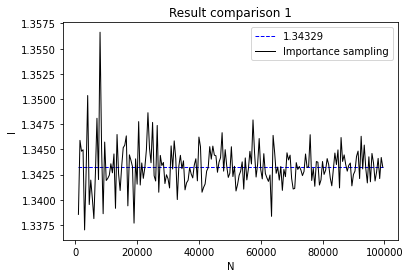

In [ ]:
# Ejercicio 1.2

Int1 = []
N_list = np.arange(1000, 100500, 500)

sol = 1.34329

for N in N_list:
  x_tries = ss.norm.rvs(loc=0, scale=0.5, size=N)
  num = f(x_tries)
  den = g(x_tries)

  result = 1/N*sum(num/den)
  Int1.append(result)

plt.plot(N_list, np.ones_like(N_list)*sol, linewidth=1, color='blue', linestyle='--', label='%s'%(sol))
plt.plot(N_list, Int1, linewidth=1, color='black', label=r'Importance sampling')
plt.title("Result comparison 1")
plt.xlabel("N")
plt.ylabel("I")
plt.legend()
plt.show()

**1.3 [1 punto]:** Realiza la misma integral utilizando el método de Monte Carlo visto en clase muestreando en un área con $y_\text{min}=0$, $y_\text{max}=1$, $x_\text{min}=-5$, $x_\text{max}=5$ y repite el plot anterior comparando los tres resultados. ¿Qué método converge mejor?

>Nota: La función $f(x)$ cae rápidamente a 0 cuando $x\rightarrow\pm\infty$, por lo que podemos coger un área entre -5 y 5 sin alterar el resultado final de forma perceptible, durante todo este ejercicio.

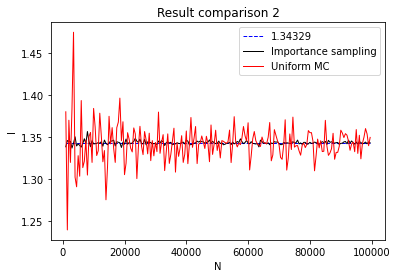

Importance sampling converge mejor al resultado de la integral


In [ ]:
# Ejercicio 1.3

Int2 = []
xmin = -5
xmax = 5
ymin = 0
ymax = 1

for N in N_list:
  x_tries = np.random.uniform(xmin, xmax, N)
  y_tries = np.random.uniform(ymin, ymax, N)

  x_valid = x_tries[y_tries <= f(x_tries)]
  y_valid = y_tries[y_tries <= f(x_tries)]

  x_novalid = x_tries[y_tries > f(x_tries)]
  y_novalid = y_tries[y_tries > f(x_tries)]  

  result = (xmax-xmin)*(ymax-ymin)*len(x_valid)/N
  Int2.append(result)


ax = plt.axes(title='Result comparison 2', xlabel='N', ylabel='I')
ax.plot(N_list, np.ones_like(N_list)*sol, linewidth=1, color='blue', linestyle='--', label='%s'%(sol))
ax.plot(N_list, Int1, linewidth=1, color='black', label=r'Importance sampling')
ax.plot(N_list, Int2, linewidth=1, color='red', label=r'Uniform MC')

plt.legend()
plt.show()

print("Importance sampling converge mejor al resultado de la integral")

## <font color='green'>**> Ejercicio #2 [3.5 puntos]**</font>

Delante de ti, a una distancia de $10$ $m$ y a una altura de $1.75$ $m$, se encuentra el centro de una diana. Esta diana tiene diferentes secciones de puntos, máximo en el centro (5) y que decrece con el radio, cada $3$ $cm$, hasta llegar a una puntuación de 1, como muestra la Figura. Tú lanzas tres dardos desde una altura de $1.5$ $m$ hacia la diana. 

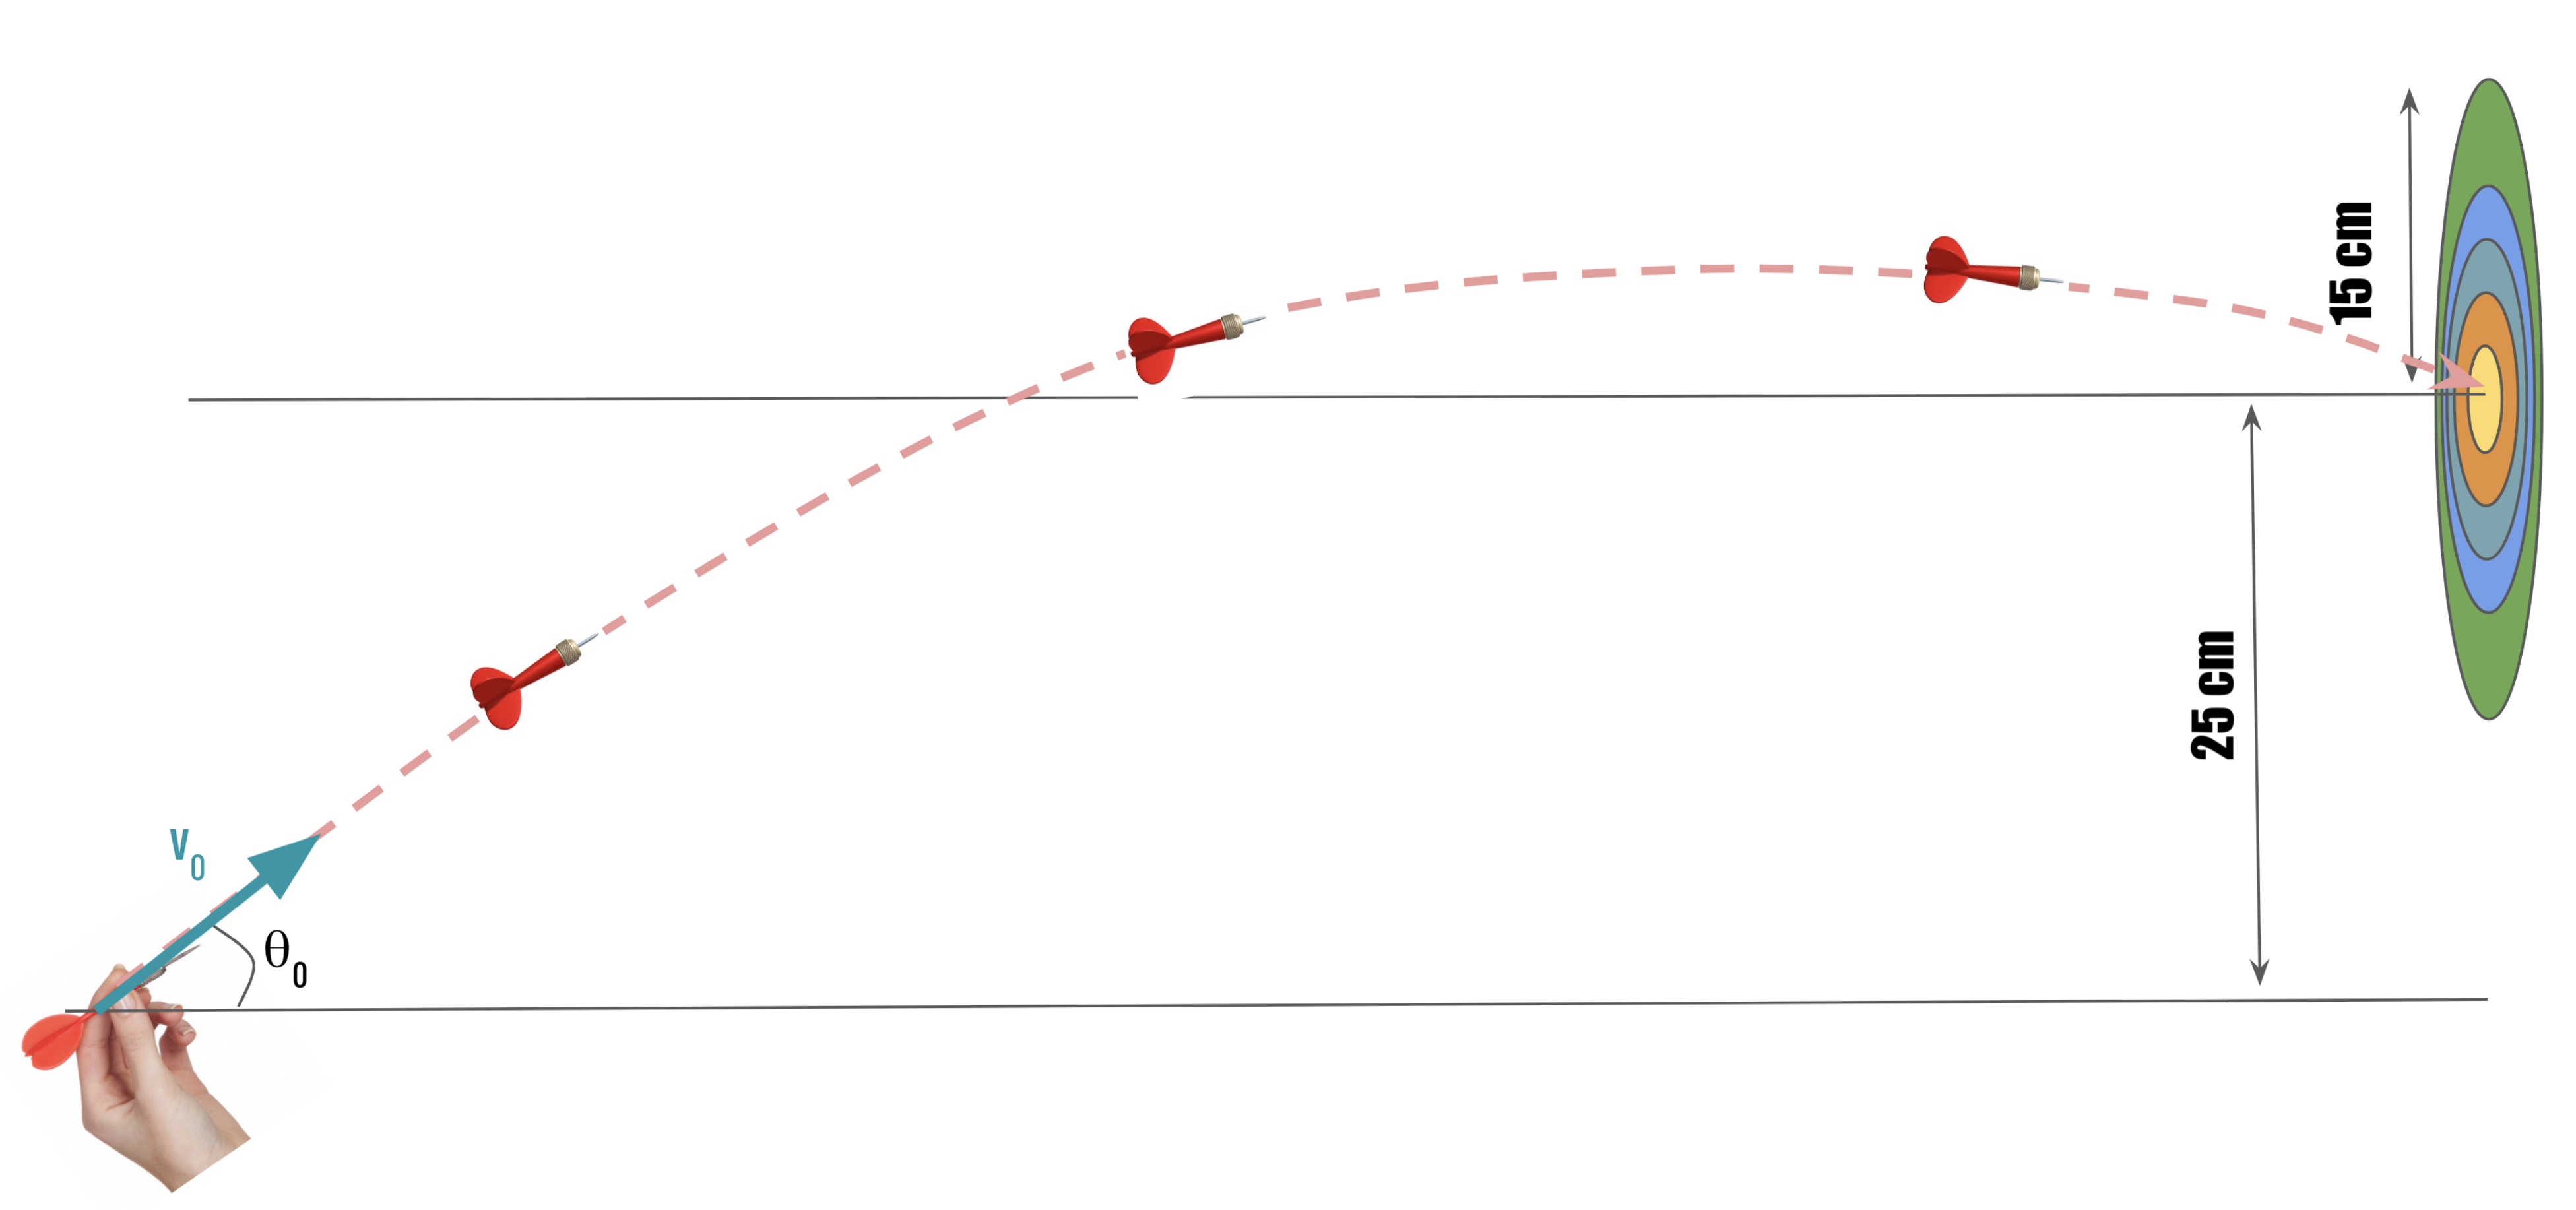

**2.1 [1.25 puntos]:** Para un ángulo de tiro de $5º$, calcula el módulo de la velocidad de salida del dardo de manera que des justo en el centro de la diana. Haz una representación gráfica de la trayectória del dardo en el plano (x,z), y la posición de la diana (puedes graficarla de forma lateral con las diferentes secciones de puntuación en diferente color). Asume $g = 9.81$ $m/s^2$, y que no hay fricción con el aire, durante el ejercicio.

*Hint:* En el caso ideal la ecuación de la trayectoria $y(x)$ del dardo se puede escribir como:

$$
y(x) = tan(\theta_0)·x - \frac{g·x^2}{2·v_0^2·cos^2(\theta_0)}
$$

donde $\theta_0$ es  el ángulo de tiro, y $v_0$ es la velocidad inicial del dardo.

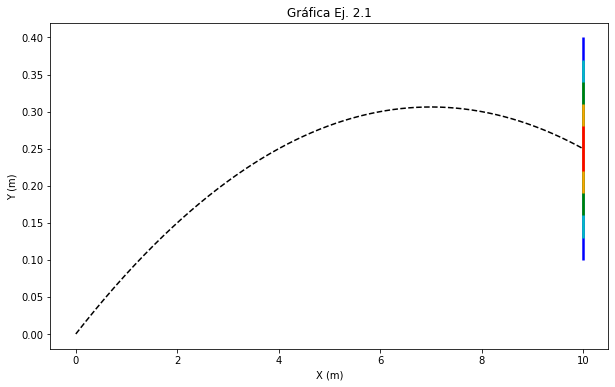

La velocidad calculada es: v0 = 28.12 m/s


In [ ]:
# Ejercicio 2.1

def y(x, theta, v):
  return np.tan(theta)*x - (9.81*x**2)/(2.*(v**2)*(np.cos(theta))**2)

g = 9.81
th0=5.*np.pi/180.
y_c = 0.25
d = 10

v0 = np.sqrt(g*d**2/(2*np.cos(th0)**2*(np.tan(th0)*d-y_c)))

x_plot = np.linspace(0,10,1000)
y_plot = y(x_plot,th0,v0)

plt.figure(figsize=(10,6))

plt.vlines(d,ymin=y_c-0.15,ymax=y_c+0.15,lw=2.5,color='b')
plt.vlines(d,ymin=y_c-0.12,ymax=y_c+0.12,lw=2.5,color='c')
plt.vlines(d,ymin=y_c-0.09,ymax=y_c+0.09,lw=2.5,color='g')
plt.vlines(d,ymin=y_c-0.06,ymax=y_c+0.06,lw=2.5,color='orange')
plt.vlines(d,ymin=y_c-0.03,ymax=y_c+0.03,lw=2.5,color='r')

plt.plot(x_plot,y_plot,'k--')
plt.title('Gráfica Ej. 2.1')
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.show()

print("La velocidad calculada es: v0 = {0:.2f} m/s".format(v0))

**2.2 [1.25 puntos]:** Aunque sepas calcular, sabes que no eres muy preciso tirando dardos... De hecho, tus tiros tienen una $v_0$ de salida promedio de unos 25 m/s y un $\theta_0$ promedio de $5º$, que siguen unas distribuciones normales, centradas en los valores de $\theta_0$ y $v_0$, y con unas desviaciones estandares de un $20\%$ relativo para los dos casos, cuando realizas múltiples tiros...

Estima la probabilidad de darle al centro, con una precisión del $1\%$. Para calcularla, repite esta experiencia muchas veces ($N_{tiros}$). Quieres estimar la probabilidad $\hat{p}$ de que el dardo de en el centro. Dibuja como evoluciona el error relativo (es decir, $\sigma[\hat{p}]/\hat{p}$, en porcentaje) con el número de dardos tirados hasta que este error sea $<1\%$. Cuántas simulaciones tienes que hacer para esta estimación de $\hat{p}$ con un error menor del $1\%$? Cuál es la probabilidad $\hat{p}$ que obtienes al final, y su error $\sigma[\hat{p}]$? (recuerda que tienes infinitos dardos a tu disposición en una simulación...). **NOTA:** Que un dardo de o no en el centro sigue una distribución binomial, donde los estimadores de $\hat{p}$ y varianza de $\hat{p}$ son:

$$
\hat{p} = \frac{N_{centro}}{N_{tiros}}
\\
$$

$$
var[\hat{p}] = \frac{p(1-p)}{N_{tiros}} ; \,\,\,\ \sigma[\hat{p}] = \sqrt{var[\hat{p}]}
\\
$$

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in double_scalars


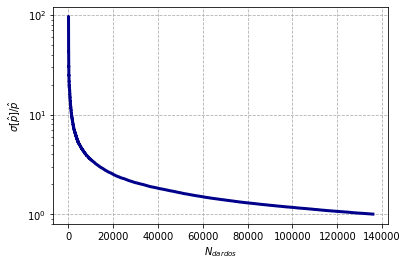

Numeros de dardos simulados: 135885
P: 6.8551 ± 0.0685 %
sigma(p)/p: 1.00 %


In [ ]:
# Ejercicio 2.2

def y(x, theta, v):
  return np.tan(theta)*x - (9.81*x**2)/(2.*(v**2)*(np.cos(theta))**2)

g = 9.81
th0=5.*np.pi/180.
y_c = 0.25
d = 10
v0 = 25

Ntiros=1000000

ncenter=0
p = []
varp = []
stdp = []
nt_t = []
errp = []

for nt in range(1,Ntiros+1):
  th=th0 + np.random.normal(0,0.2*th0)
  v=v0 + np.random.normal(0,0.2*v0)
  y_test=y(d,th,v)
  if (np.abs(y_test-y_c)<0.03) : ncenter+=1
  p_tmp = ncenter/nt
  p.append(ncenter/nt)
  varp.append(p_tmp*(1-p_tmp)/nt)
  stdp.append(np.sqrt(p_tmp*(1-p_tmp)/nt))
  errp.append(100.*np.sqrt(p_tmp*(1-p_tmp)/nt)/p_tmp)
  nt_t.append(nt)

  if nt > 100 and 100.*np.sqrt(p_tmp*(1-p_tmp)/nt)/p_tmp< 1.: 
    break

plt.plot(nt_t,errp,color='darkblue',lw=3)
plt.xlabel('$N_{dardos}$')
plt.ylabel('$\sigma[\hat{p}]/\hat{p}$')
plt.yscale('log', nonposy='clip')
plt.grid(True, linestyle="--")
plt.show()

print("Numeros de dardos simulados: {}".format(nt_t[-1]))
print("P: {0:.4f} \u00B1 {1:.4f} %".format(100.*p[-1],100.*stdp[-1]))
print("sigma(p)/p: {0:.2f} %".format(errp[-1]))

**2.3 [1 punto]:** Si realizas los tiros siguiendo el patrón del apartado 2.2, haz una distribución de probabilidad de la puntuación obtenida tirando los 3 dardos de los que dispones en cada uno de tus turnos. Para ello, simula unas 500k realizaciones de tus turnos de tiro. Cual es la puntuación más probable de obtener y cuál es su probabilidad? Las puntuaciones van desde 0 (todos los dardos fuera) hasta 15 (todos los dardos en el centro). Aquellos dardos que den justo en la linea de separación de regiones, cuenta la puntuación más alta...

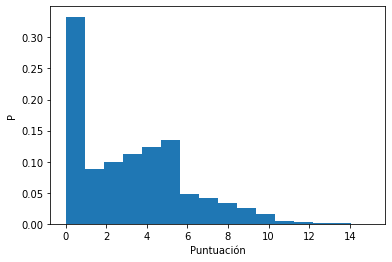

La puntuación más probable es 0, con una probabilidad del 33.33 %


In [ ]:
# Ejercicio 2.3

def y(x, theta, v):
  return np.tan(theta)*x - (9.81*x**2)/(2.*(v**2)*(np.cos(theta))**2)

g = 9.81
th0=5.*np.pi/180.
y_c = 0.25
d = 10
v0 = 25

Ntiros=500000

punt_f = []

for nt in range(1,Ntiros+1):

  punt = 0
  for dard in range(1,4):
    th=th0 + np.random.normal(0,.2*th0)
    v=v0 + np.random.normal(0,.2*v0)
    y_test=y(d,th,v)
#    print(np.abs(y_test-y_c))
    if (np.abs(y_test-y_c)<=0.03) : p=5
    if (np.abs(y_test-y_c)<=0.06 and np.abs(y_test-y_c)>0.03) : p=4
    if (np.abs(y_test-y_c)<=0.09 and np.abs(y_test-y_c)>0.06) : p=3
    if (np.abs(y_test-y_c)<=0.12 and np.abs(y_test-y_c)>0.09) : p=2
    if (np.abs(y_test-y_c)<=0.15 and np.abs(y_test-y_c)>0.12) : p=1
    if (np.abs(y_test-y_c)>0.15): p=0
    punt+=p
  punt_f.append(punt)
#    print(nt,dard,p,punt)

(n, bins, patches) = plt.hist(punt_f,bins=16, range=(0,15), density=True)
plt.ylabel("P")
plt.xlabel("Puntuación")
plt.show()

elem = np.argmax(n)

print("La puntuación más probable es {0:}, con una probabilidad del {1:.2f} %".format(elem, 100.*n[elem]))

## <font color='green'>**> Ejercicio #3 [3 puntos]**</font>

Tienes una baraja de 52 cartas (4 palos de 13 cartas). Las barajas y descartas las 4 primeras cartas, sin mirar qué cartas son. En su lugar pones 4 reyes que has sacado de otra baraja. Vuelves a barajar, y descubres las N primeras cartas.

**3.1 [1.5 puntos]:** Cuál es la probabilidad de que la primera carta que descubras sea un rey? 

Para calcular una probabilidad de este tipo podemos usar la definición frecuentista, en la que para un número $N$ de realizaciones del experimento se calcula la probabilidad como:

$$
P(A) = \frac{\text{# de veces que ha ocurrido A}}{N}
$$

que tiende al valor real si $N \to \infty$.

Implementaremos un algoritmo que simula de $N=1$ a $N=50000$ realizaciones de este experimento y cuenta cuántas veces ocurre que salga 1 rey como primera carta.

Genera una gráfica mostrando cómo evoluciona la probabilidad P a medida que $N$ aumenta (de 1 a 50000). Puedes ver mejor esta gráfica si haces que el eje x esté en escala logarítmica. 

>**Nota** Para modelizar este escenario tendrás que utilizar herramientas de generación y manipulación de arrays. Puedes generar un array de 52 números enteros que se correspondan a cada carta de la baraja. Para barajar un array $a$ puedes usar el método ``random.shuffle(a)``, y luego manipular las primeras entradas para poner 4 reyes, y volver a aplicar el ``random.shuffle(a)``...

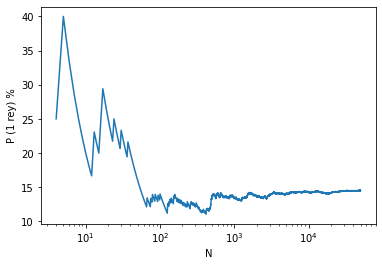

La Probabilidad es del 14.51 %


In [ ]:
# Ejercicio 3.1

a = []
N = []

N_r = 0
N_1R = 0

for i in np.arange(1,50e3):
  N_r+=1
  card_list = np.arange(1,53) # creamos la baraja
#  print(card_list)
  random.shuffle(card_list) #1st shuffle method

#  print(card_list)
# Descartamos las 4 primeras cartas, y sustituimos por los otros reyes
  card_list[0] = 13
  card_list[1] = 26
  card_list[2] = 39
  card_list[3] = 52
#  print(card_list)

  random.shuffle(card_list) #2nd shuffle method

#  print(card_list)
  if (card_list[0] % 13 == 0): N_1R +=1

  if (N_1R != 0):
    N.append(N_r)
    a.append(100.*N_1R/N_r)

plt.plot(N,a)
plt.xlabel("N")
plt.ylabel("P (1 rey) %")
plt.xscale("log")
plt.show()

print("La Probabilidad es del {0:.2f} %".format(a[-1]))


**3.2 [1.5 puntos]:** Repite el apartado anterior para producir un histograma con las probabilidades de que las primeras N cartas que se descubran sean reyes. Es decir, un histograma entre 1 y 8, ya que el máximo de reyes que podrías sacar de forma consecutiva podrían ser 8... 50000 realizaciones es suficiente, o tendrías que hacer más para que hacer converger mejor el caso más extremo de 8 reyes? Puede ser que tengas que usar escala logarítmica en el eje $y$...

Not enough stats - la Probabilidad de 6 reyes es del 0.00 %
Not enough stats - la Probabilidad de 7 reyes es del 0.00 %
Not enough stats - la Probabilidad de 8 reyes es del 0.00 %


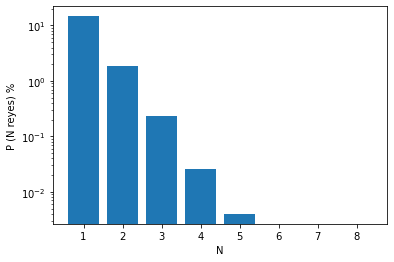

In [ ]:
# Ejercicio 3.2

a1, a2, a3, a4, a5, a6, a7, a8 = ([] for i in range(8))
N1, N2, N3, N4, N5, N6, N7, N8 = ([] for i in range(8))

N_r = 0
N_1R = N_2R = N_3R = N_4R = N_5R = N_6R = N_7R = N_8R = 0

for i in np.arange(1,50e3):
  N_r+=1
  card_list = np.arange(1,53) # creamos la baraja
  random.shuffle(card_list) #1st shuffle method

# Descartamos las 4 primeras cartas, y sustituimos por los otros reyes
  card_list[0] = 13
  card_list[1] = 26
  card_list[2] = 39
  card_list[3] = 52

  random.shuffle(card_list) #2nd shuffle method

  if (card_list[0] % 13 == 0): N_1R +=1
  if (card_list[0] % 13 == 0 and card_list[1] % 13 == 0): N_2R +=1
  if (card_list[0] % 13 == 0 and card_list[1] % 13 == 0 and card_list[2] % 13 == 0): N_3R +=1
  if (card_list[0] % 13 == 0 and card_list[1] % 13 == 0 and card_list[2] % 13 == 0 and card_list[3] % 13 == 0): N_4R +=1
  if (card_list[0] % 13 == 0 and card_list[1] % 13 == 0 and card_list[2] % 13 == 0 and card_list[3] % 13 == 0 and card_list[4] % 13 == 0): N_5R +=1
  if (card_list[0] % 13 == 0 and card_list[1] % 13 == 0 and card_list[2] % 13 == 0 and card_list[3] % 13 == 0 and card_list[4] % 13 == 0 and card_list[5] % 13 == 0): N_6R +=1
  if (card_list[0] % 13 == 0 and card_list[1] % 13 == 0 and card_list[2] % 13 == 0 and card_list[3] % 13 == 0 and card_list[4] % 13 == 0 and card_list[5] % 13 == 0 and card_list[6] % 13 == 0): N_7R +=1
  if (card_list[0] % 13 == 0 and card_list[1] % 13 == 0 and card_list[2] % 13 == 0 and card_list[3] % 13 == 0 and card_list[4] % 13 == 0 and card_list[5] % 13 == 0 and card_list[6] % 13 == 0 and card_list[7] % 13 == 0): N_8R +=1


  if (N_1R != 0):
    N1.append(N_r)
    a1.append(100.*N_1R/N_r)
  if (N_2R != 0):
    N2.append(N_r)
    a2.append(100.*N_2R/N_r)
  if (N_3R != 0):
    N3.append(N_r)
    a3.append(100.*N_3R/N_r)
  if (N_4R != 0):
    N4.append(N_r)
    a4.append(100.*N_4R/N_r)
  if (N_5R != 0):
    N5.append(N_r)
    a5.append(100.*N_5R/N_r)
  if (N_6R != 0):
    N6.append(N_r)
    a6.append(100.*N_6R/N_r)    
  if (N_7R != 0):
    N7.append(N_r)
    a7.append(100.*N_7R/N_r)
  if (N_8R != 0):
    N8.append(N_r)
    a8.append(100.*N_8R/N_r)

if len(a1) == 0: 
  a1.append(0)
  print("Not enough stats - la Probabilidad de 1 rey es del {0:.2f} %".format(a1[-1]))
if len(a2) == 0:
  a2.append(0)
  print("Not enough stats - la Probabilidad de 2 reyes es del {0:.2f} %".format(a2[-1]))
if len(a3) == 0: 
  a3.append(0)
  print("Not enough stats - la Probabilidad de 3 reyes es del {0:.2f} %".format(a3[-1]))
if len(a4) == 0: 
  a4.append(0)
  print("Not enough stats - la Probabilidad de 4 reyes es del {0:.2f} %".format(a4[-1]))
if len(a5) == 0: 
  a5.append(0)
  print("Not enough stats - la Probabilidad de 5 reyes es del {0:.2f} %".format(a5[-1]))
if len(a6) == 0: 
  a6.append(0)
  print("Not enough stats - la Probabilidad de 6 reyes es del {0:.2f} %".format(a6[-1]))
if len(a7) == 0: 
  a7.append(0)
  print("Not enough stats - la Probabilidad de 7 reyes es del {0:.2f} %".format(a7[-1]))
if len(a8) == 0: 
  a8.append(0)
  print("Not enough stats - la Probabilidad de 8 reyes es del {0:.2f} %".format(a8[-1]))

x = np.arange(1,9)
y = [a1[-1], a2[-1], a3[-1], a4[-1], a5[-1], a6[-1], a7[-1], a8[-1]]

plt.bar(x,y)
plt.xlabel("N")
plt.ylabel("P (N reyes) %")
plt.yscale('log')
plt.show()